In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import rawio.IO as io #will import at all?
import glob, pickle, os, sys, uproot, sys
#import joblib
#from tqdm import tqdm_notebook
from scdmsPyTools.Traces.Filtering import *
from scdmsPyTools.Traces.Noise import *
from scdmsPyTools.TES.Templates import *
from scdmsPyTools.Traces.Stats import *
#from scdmsPyTools.BatTools.IO import *
from rawio import IO
from ROOT import TCanvas, TGraph, gStyle, TH1F
#from ROOT import TF1
import uproot

Welcome to JupyROOT 6.24/06


In [2]:
#Constants
#procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/nexus/midasdata/NEXUS/R7/processed/auto_proc/OFResults_"
#procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/nexus/midasdata/NEXUS/R7/processed/master_releases/v2.0.0/OFResults_"
gpfdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/umn/raw/"
#procdir = "/gpfs/slac/staas/fs1/g/supercdms/tf/umn/rq/"
frittsdir = "/data/chocula/fritts/data/k100proc/midas"

#72208301829
series='07181007_1415'
series='07220830_1829'
procseries='07191122_0915/'

In [3]:
print(frittsdir+"raw/"+"byseries")

/data/chocula/fritts/data/k100proc/midasraw/byseries


In [4]:
events=io.getRawEvents(frittsdir+"raw/"+"byseries/"
                       ,series)
 # 2 series of Tower 4 iZIP data at SLAC 
#frittsdir = '/data/chocula/fritts/data/k100proc/midasraw/byseries'
#series_list = ['07220830_1829']
#myreader = io.RawDataReader(filepath=frittsdir, series=series_list)
#events = myreader.read_events(nb_events=62000, output_format=1,
#                              skip_empty=True,
#                              trigger_types =[1,2,3],
#                              detector_nums = [2],
#                              channel_names=['PA', 'PB','PC','PD'])

The file is: /data/chocula/fritts/data/k100proc/midasraw/byseries//07220830_1829/07220830_1829_F0001.mid.gz

Opened raw midas file: /data/chocula/fritts/data/k100proc/midasraw/byseries//07220830_1829/07220830_1829_F0001.mid.gz
The file is: /data/chocula/fritts/data/k100proc/midasraw/byseries//07220830_1829/07220830_1829_F0002.mid.gz

Opened raw midas file: /data/chocula/fritts/data/k100proc/midasraw/byseries//07220830_1829/07220830_1829_F0002.mid.gz
The file is: /data/chocula/fritts/data/k100proc/midasraw/byseries//07220830_1829/07220830_1829_F0003.mid.gz

Opened raw midas file: /data/chocula/fritts/data/k100proc/midasraw/byseries//07220830_1829/07220830_1829_F0003.mid.gz
The file is: /data/chocula/fritts/data/k100proc/midasraw/byseries//07220830_1829/07220830_1829_F0004.mid.gz

Opened raw midas file: /data/chocula/fritts/data/k100proc/midasraw/byseries//07220830_1829/07220830_1829_F0004.mid.gz
The file is: /data/chocula/fritts/data/k100proc/midasraw/byseries//07220830_1829/07220830_18

In [5]:
type(events)

pandas.core.frame.DataFrame

In [8]:
events['Z1']['PA'].info()

<class 'pandas.core.series.Series'>
MultiIndex: 95555 entries, (72208301829, 10000) to (72208301829, 1130481)
Series name: PA
Non-Null Count  Dtype 
--------------  ----- 
95555 non-null  object
dtypes: object(1)
memory usage: 3.9+ MB


In [9]:
print(events['Z1']['PA'][72208301829, 10000])

[3088 3090 3091 ... 3084 3083 3081]


In [6]:
#for ev in events['Z1']['PA']:
#    print ev

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(ev)? (846157106.py, line 2)

In [48]:
#from pprint import pprint
#print(events.keys())
#print(np.shape(events['Z4']['PA']))
#print(np.shape(np.asarray(events['Z4']['PA'])))
#pprint(events['Z1']['PA'])

RangeIndex(start=0, stop=0, step=1)


KeyError: 'Z4'

In [10]:
print(events.keys())

MultiIndex([('Z1', 'QI'),
            ('Z1', 'QO'),
            ('Z1', 'PA'),
            ('Z1', 'PB'),
            ('Z1', 'PC'),
            ('Z1', 'PD'),
            ('Z3', 'QI'),
            ('Z3', 'QO'),
            ('Z3', 'PA'),
            ('Z3', 'PB'),
            ('Z3', 'PC'),
            ('Z3', 'PD'),
            ('Z4', 'QI'),
            ('Z4', 'QO'),
            ('Z4', 'PA'),
            ('Z4', 'PB'),
            ('Z4', 'PC'),
            ('Z4', 'PD')],
           )


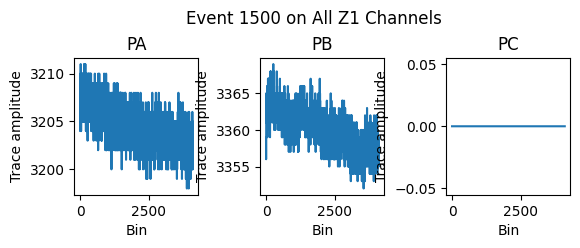

In [15]:
channels=['PA','PB','PC']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

for j,channel in enumerate(channels):
    plt.subplot(2,3,j+1)
    plt.plot(events['Z1'][channel][72208301829, 620687]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Z1 Channels')
plt.show()

In [ ]:
channels2=['PB','PC','PD']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

for j,channel in enumerate(channels2):
    plt.subplot(2,3,j+1)
    plt.plot(events.Z3[channel][1500]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Z3 Channels')
plt.show()

In [ ]:
channels2=['PA','PB']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)

for j,channel in enumerate(channels2):
    plt.subplot(2,3,j+1)
    plt.plot(events.Z4[channel][1500]) # index 0 corresponds to first event
    plt.title(channel)
    plt.xlabel('Bin')
    plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Z4 Channels')
plt.show()

In [ ]:
plt.figure()

for j in range(1499,1505):
    plt.plot(events.Z1.PA[j]) # iterate over the first 20 events

plt.title('6 Sample Events on Z1PA')
plt.show()

In [ ]:
events['Z1']['PA'][0]

In [ ]:
zips=['Z1','Z3']
channels=['PA','PB','PC','PD']

fig = plt.figure()
fig.subplots_adjust(hspace=0.7, wspace=0.5)
for i,zips in enumerate(zips):
    plt.subplot(2,3,i+1) 
    for j,channel in enumerate(channels):
        plt.subplot(2,3,j+1)
        plt.plot(events[zips][channel][1500],label=zips) # index 0 corresponds to first event
        plt.title(channel)
        plt.xlabel('Bin')
        plt.ylabel('Trace amplitude')

plt.suptitle('event 1500 on All Channels')
plt.legend()
plt.show()

In [ ]:
#Re-map events to actual channels
zips=['Z1','Z3']
channels=['PA','PB','PC','PD']

for zips in (zips):
    for channels in (channels):
        for i in (events[zips][channels]):
            if zips=='Z1':
                if channels=='PA':
                    eventsMap['PE'][i]=dict()
                    eventsMap['PE'][i].append(events[zips][channels][i])
                elif channels=='PB':
                    eventsMap['PB'][i]=dict()
                    eventsMap['PB'][i].append(events[zips][channels][i])
                elif channels=='PC':
                    eventsMap['PD'][i]=dict()
                    eventsMap['PD'][i].append(events[zips][channels][i])
            elif zips=='Z3':
                if channels=='PB':
                    eventsMap['PA'][i]=dict()
                    eventsMap['PA'][i].append(events[zips][channels][i])
                elif channels=='PC':
                    eventsMap['PC'][i]=dict()
                    eventsMap['PC'][i].append(events[zips][channels][i])
                elif channels=='PD':
                    eventsMap['PF'][i]=dict()
                    eventsMap['PF'][i].append(events[zips][channels][i])

In [ ]:
eventsMap['PA']

In [ ]:
for j,channel in enumerate(detchan):
        plt.subplot(2,3,j+1)
        plt.plot(eventsMap[channel][1500]) # index 0 corresponds to first event
        plt.title(channel)
        plt.xlabel('Bin')
        plt.ylabel('Trace amplitude')

plt.suptitle('Event 1500 on All Channels')
plt.legend()
plt.show()

In [ ]:
RQ[1].allkeys()

In [ ]:
PTOFamps=[]
for i in range(1,10):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(11,20):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(21,29):
    PTOFamps.extend(RQ[i]['rqDir/zip1']['PTOFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
plt.hist(PTOFamps,bins=100,range=[1e-8,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [ ]:
PFS1OFamps=[]
for i in range(1,10):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(11,20):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(21,29):
    PFS1OFamps.extend(RQ[i]['rqDir/zip1']['PFS1OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
plt.hist(PFS1OFamps,bins=100,range=[0,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

In [ ]:
PFS2OFamps=[]
for i in range(1,10):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(11,20):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
for i in range(21,29):
    PFS2OFamps.extend(RQ[i]['rqDir/zip1']['PFS2OFamps'].array()[RQ[i]['rqDir/eventTree']['EventCategory'].array()==0])

In [ ]:
plt.hist(PFS2OFamps,bins=100,range=[0,1e-6])
plt.yscale('log')

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))